In [4]:
import pandas as pd

data = pd.read_csv(r'D:\DataAnalytics\MyProjects\bank-additional.csv', sep=';')


In [6]:
# View the first few rows of the dataset
print(data.head())

# Get basic info about the dataset
print('basic info about the dataset')
print(data.info())

# Check for missing values
print('check Null Values')
print(data.isnull().sum())


   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [7]:
# Example: Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)  # Converts categorical variables into dummy/indicator variables

# Drop unnecessary columns if necessary
# data.drop(columns=['unnecessary_column'], inplace=True)


In [8]:
# Define features and target
X = data.drop('y_yes', axis=1)  # Assuming 'y_yes' indicates a purchase
y = data['y_yes']


In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
#Step 7: Make Predictions
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the confusion matrix
#Step 8: Evaluate the Model

print('the confusion matrix is : ')
print(confusion_matrix(y_test, y_pred))
print('--------------------------')
# Print classification 
print('classification report : ') 
print(classification_report(y_test, y_pred))
print('---------------------------')

# Print accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))


the confusion matrix is : 
[[684  48]
 [ 49  43]]
--------------------------
classification report : 
              precision    recall  f1-score   support

       False       0.93      0.93      0.93       732
        True       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824

---------------------------
Accuracy: 0.8822815533980582


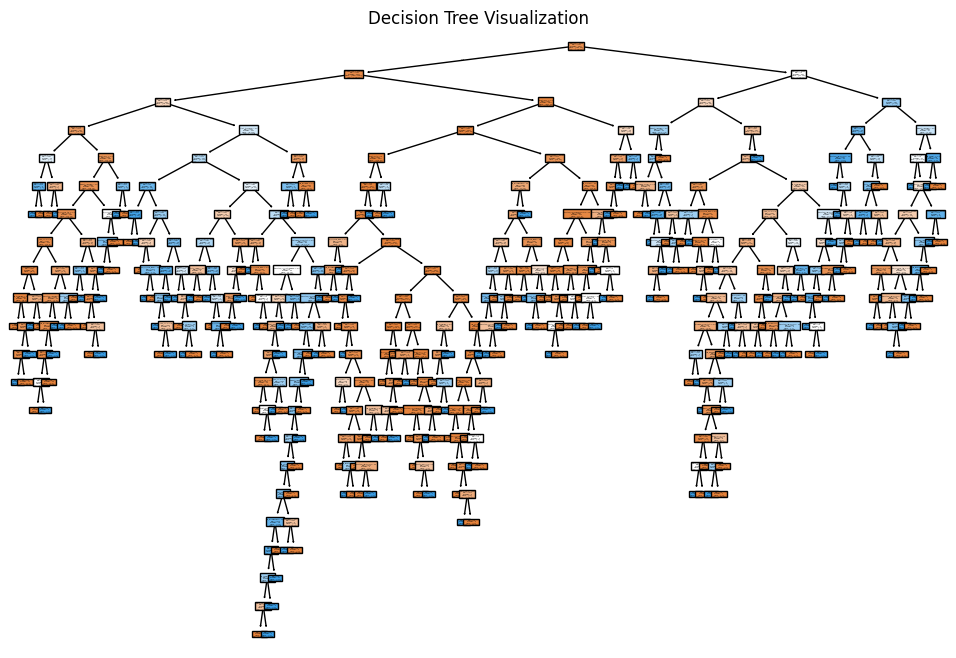

In [15]:
#Step 9: Visualize the Decision Tree (Optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.title('Decision Tree Visualization')
plt.show()
